In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

In [4]:
data = pd.read_csv('./data/dieta-clean.csv')

In [5]:
data = data[['estado','edad','time','peso total','hcrop']].dropna()

In [6]:
data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S').dt.time
data['period'] = data['time'].apply(lambda x: 'M' if x <= pd.to_datetime('13:00:00').time() else 'V')

In [7]:
data = data[['estado','edad','period','peso total','hcrop']]

In [8]:
data

,estado,edad,period,peso total,hcrop
0,NM,J,V,9.7584,0.000000
1,NM,J,V,3.9632,0.000000
2,AZ,A,V,5.4562,0.785803
3,NM,J,V,4.4976,0.464732
4,AZ,J,V,5.4630,1.680150
...,...,...,...,...,...
314,NM,A,M,0.3501,0.112925
315,NM,J,M,0.1977,0.000000
316,NM,J,M,2.6084,0.065394
317,NM,A,V,7.3265,0.000000


Distribución del peso en el buche de las aves

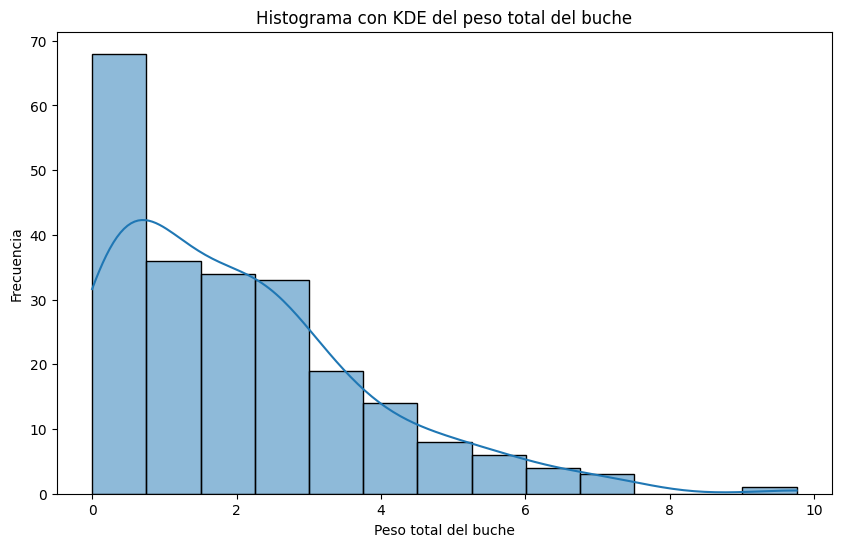

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data['peso total'], kde=True)
plt.title('Histograma con KDE del peso total del buche')
plt.xlabel('Peso total del buche')
plt.ylabel('Frecuencia')
plt.show()

Ahora se prueba la distribución del log del peso total del buche

c:\Users\Rodolfo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


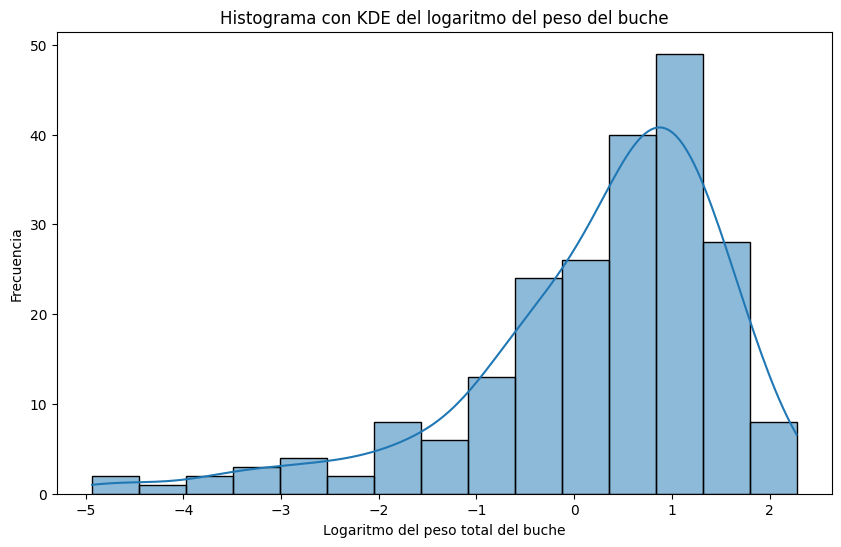

In [10]:
logdata_peso = np.log(data['peso total'])
logdata_peso = logdata_peso.replace(float('-inf'), pd.NA).dropna()
plt.figure(figsize=(10, 6))
sns.histplot(logdata_peso, kde=True)
plt.title('Histograma con KDE del logaritmo del peso del buche')
plt.xlabel('Logaritmo del peso total del buche')
plt.ylabel('Frecuencia')
plt.show()

Parece ser normal con un con sesgo hacia la izquierda, se procede a hacer pruebas de normalidad para el log

In [11]:
# Prueba de Shapiro-Wilk
stat, p_value = stats.shapiro(logdata_peso)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")

# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0")
else:
    print("se rechaza H0")

Shapiro-Wilk Test: Estadístico=0.8797469617716118, p-valor=4.44332841013825e-12
se rechaza H0


Hay evidencia para rechazar que la muestra del peso del buche venga de una distribución lognormal.

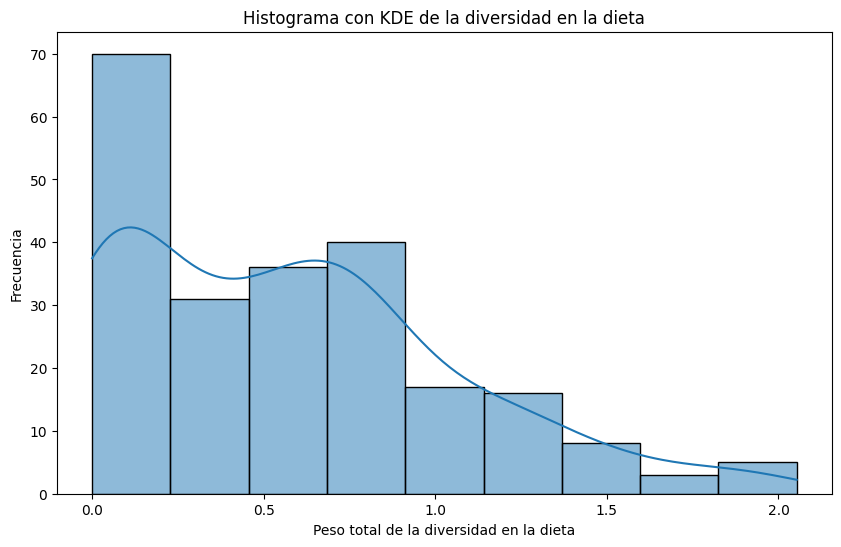

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['hcrop'], kde=True)
plt.title('Histograma con KDE de la diversidad en la dieta')
plt.xlabel('Peso total de la diversidad en la dieta')
plt.ylabel('Frecuencia')
plt.show()

Se probará nuevamente con el log de la variable

c:\Users\Rodolfo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


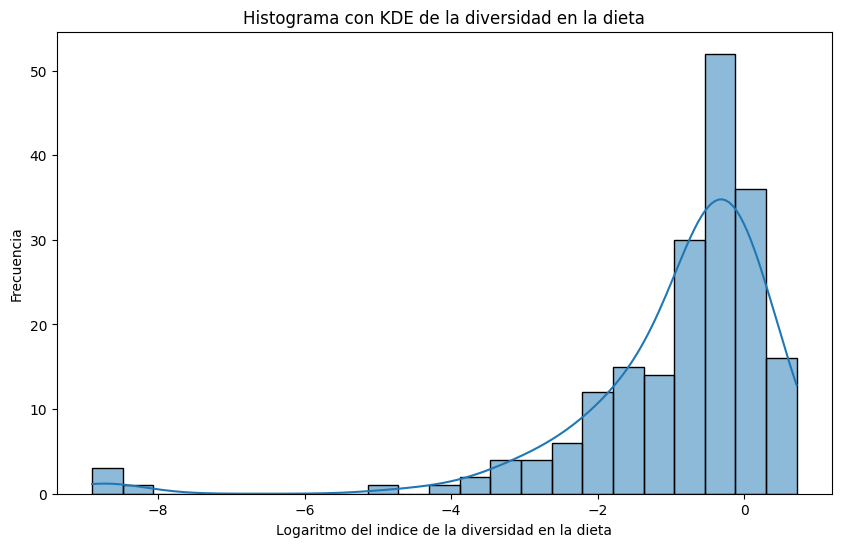

In [13]:
logdata_hcrop = np.log(data['hcrop'])
logdata_hcrop = logdata_hcrop.replace(float('-inf'), pd.NA).dropna()
plt.figure(figsize=(10, 6))
sns.histplot(logdata_hcrop, kde=True)
plt.title('Histograma con KDE de la diversidad en la dieta')
plt.xlabel('Logaritmo del indice de la diversidad en la dieta')
plt.ylabel('Frecuencia')
plt.show()

Parece suceder lo mismo que con el peso

In [14]:
# Prueba de Shapiro-Wilk
stat, p_value = stats.shapiro(logdata_hcrop)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")

# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0")
else:
    print("se rechaza H0")

Shapiro-Wilk Test: Estadístico=0.7056347411986446, p-valor=2.2472432476021902e-18
se rechaza H0


Hay evidencia para rechazar la hipotesis de que la muestra de la diversidad de la dieta viene de una distribución lognormal.

Se procedera con determinar la normalidad de las variables por grupos.

In [19]:
#Agregamos columnas con el log de las variables de interes
data['log peso total'] = np.log(data['peso total'])
data['log hcrop'] = np.log(data['hcrop'])

c:\Users\Rodolfo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Prueba de normalidad por estado

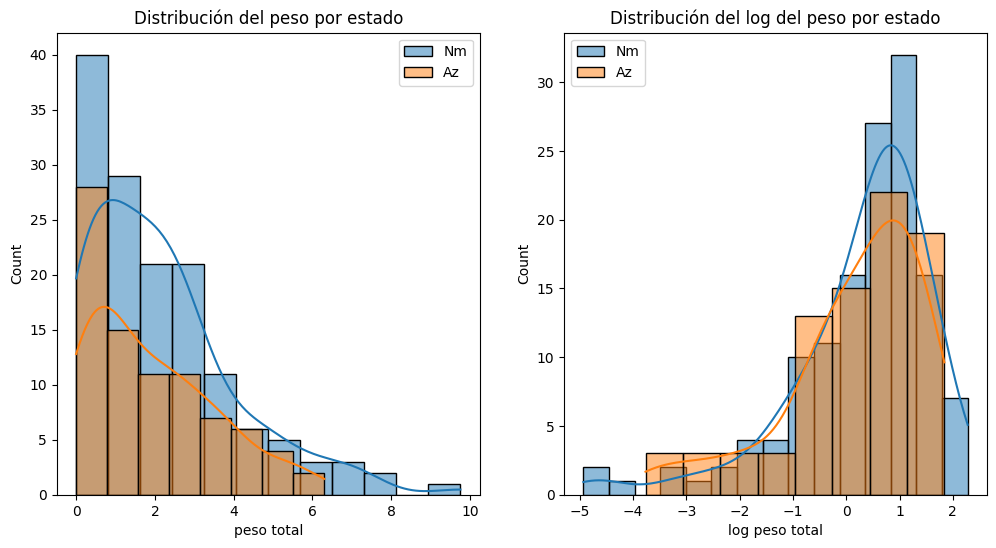

**************************************************************************************************************************
Prueba de normalidad para el grupo Az
--------------------------------------------------------------------------------------------------------------------------
Peso total del buche
Shapiro-Wilk Test: Estadístico=0.9182637796471044, p-valor=5.281718387715937e-05
se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal
Log del peso total del buche
Shapiro-Wilk Test: Estadístico=0.8854358471425815, p-valor=2.7584129211176583e-06
se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal
**************************************************************************************************************************
Prueba de normalidad para el grupo Nm
--------------------------------------------------------------------------------------------------------------------

In [52]:
az= data[data['estado'] == 'AZ']
nm = data[data['estado'] == 'NM']

plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.histplot(nm['peso total'], kde=True, label = 'Nm')
sns.histplot(az['peso total'], kde=True, label = 'Az')
plt.title(f'Distribución del peso por estado')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(nm['log peso total'], kde=True, label = 'Nm')
sns.histplot(az['log peso total'], kde=True, label = 'Az')
plt.title(f'Distribución del log del peso por estado')
plt.legend()

plt.show()

print('**************************************************************************************************************************')
print('Prueba de normalidad para el grupo Az')
print('--------------------------------------------------------------------------------------------------------------------------')
print('Peso total del buche')
peso_az = az['peso total']
stat, p_value = stats.shapiro(peso_az)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")
# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
    
print('Log del peso total del buche')
peso_az = az['log peso total'].replace(float('-inf'), pd.NA).dropna()
stat, p_value = stats.shapiro(peso_az)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")
# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
    
print('**************************************************************************************************************************')
print('Prueba de normalidad para el grupo Nm')
print('--------------------------------------------------------------------------------------------------------------------------')
print('Peso total del buche')
peso_nm = nm['peso total']
stat, p_value = stats.shapiro(peso_nm)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")
# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")

print('Log del peso total del buche')
peso_nm = nm['log peso total'].replace(float('-inf'), pd.NA).dropna()
stat, p_value = stats.shapiro(peso_nm)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")

# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")

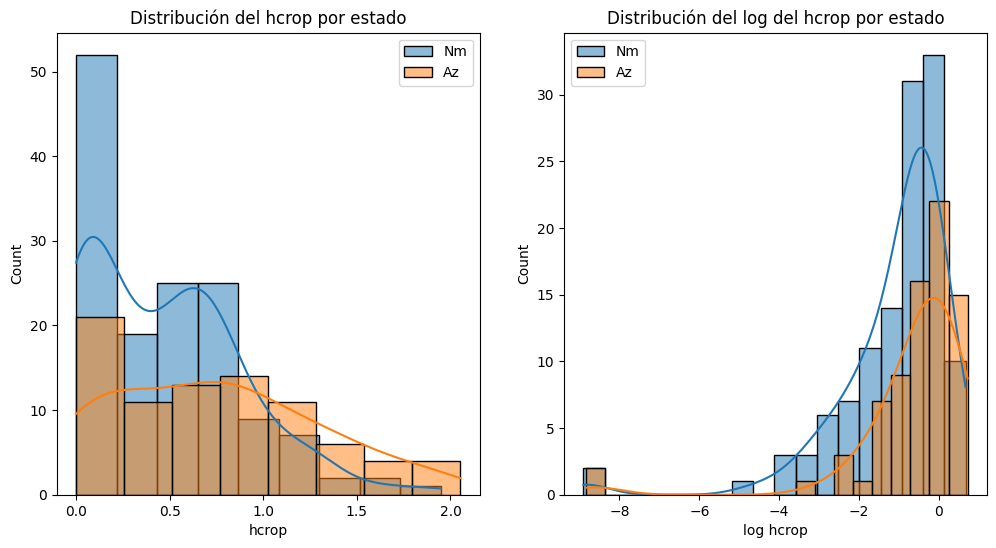

**************************************************************************************************************************
Prueba de normalidad para el grupo Az
--------------------------------------------------------------------------------------------------------------------------
hcrop
Shapiro-Wilk Test: Estadístico=0.9535307602513973, p-valor=0.00418755182215255
se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal
Log del hcrop
Shapiro-Wilk Test: Estadístico=0.6024686164795174, p-valor=4.947264493153479e-13
se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal
**************************************************************************************************************************
Prueba de normalidad para el grupo Nm
--------------------------------------------------------------------------------------------------------------------------
hcrop
Shapiro-Wilk Test: E

In [56]:
az= data[data['estado'] == 'AZ']
nm = data[data['estado'] == 'NM']

plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.histplot(nm['hcrop'], kde=True, label = 'Nm')
sns.histplot(az['hcrop'], kde=True, label = 'Az')
plt.title(f'Distribución del hcrop por estado')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(nm['log hcrop'], kde=True, label = 'Nm')
sns.histplot(az['log hcrop'], kde=True, label = 'Az')
plt.title(f'Distribución del log del hcrop por estado')
plt.legend()

plt.show()

print('**************************************************************************************************************************')
print('Prueba de normalidad para el grupo Az')
print('--------------------------------------------------------------------------------------------------------------------------')
print('hcrop')
hcrop_az = az['hcrop']
stat, p_value = stats.shapiro(hcrop_az)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")
# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
    
print('Log del hcrop')
hcrop_az = az['log hcrop'].replace(float('-inf'), pd.NA).dropna()
stat, p_value = stats.shapiro(hcrop_az)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")
# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
    
print('**************************************************************************************************************************')
print('Prueba de normalidad para el grupo Nm')
print('--------------------------------------------------------------------------------------------------------------------------')
print('hcrop')
hcrop_nm = nm['hcrop']
stat, p_value = stats.shapiro(hcrop_nm)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")
# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")

print('Log del hcrop')
hcrop_nm = nm['log hcrop'].replace(float('-inf'), pd.NA).dropna()
stat, p_value = stats.shapiro(hcrop_nm)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")

# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")

### Prueba de normalidad por edad

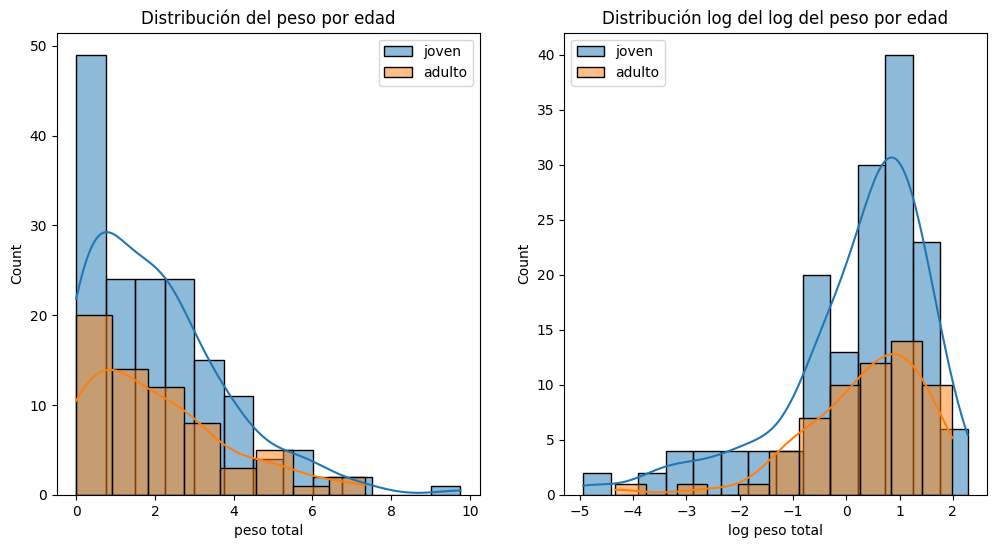

**************************************************************************************************************************
Prueba de normalidad para el grupo adulto
--------------------------------------------------------------------------------------------------------------------------
Peso total del buche
Shapiro-Wilk Test: Estadístico=0.9014616241839254, p-valor=8.048900620788972e-05
se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal
Log del peso total del buche
Shapiro-Wilk Test: Estadístico=0.9000054351855683, p-valor=0.00013159352662860284
se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal
**************************************************************************************************************************
Prueba de normalidad para el grupo joven
-------------------------------------------------------------------------------------------------------------

In [50]:
#Separación por grupos
adulto= data[data['edad'] == 'A']
joven = data[data['edad'] == 'J']

#Graficos
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.histplot(joven['peso total'], kde=True, label = 'joven')
sns.histplot(adulto['peso total'], kde=True, label = 'adulto')
plt.title(f'Distribución del peso por edad')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(joven['log peso total'], kde=True, label = 'joven')
sns.histplot(adulto['log peso total'], kde=True, label = 'adulto')
plt.title(f'Distribución log del log del peso por edad')
plt.legend()

plt.show()

print('**************************************************************************************************************************')
print('Prueba de normalidad para el grupo adulto')
print('--------------------------------------------------------------------------------------------------------------------------')
print('Peso total del buche')

peso_adulto = adulto['peso total']
stat, p_value = stats.shapiro(peso_adulto)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")
# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")

print('Log del peso total del buche')
peso_adulto = adulto['log peso total'].replace(float('-inf'), pd.NA).dropna()
stat, p_value = stats.shapiro(peso_adulto)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")
# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
    
print('**************************************************************************************************************************')
print('Prueba de normalidad para el grupo joven')
print('--------------------------------------------------------------------------------------------------------------------------')
print('Peso total del buche')
peso_joven = joven['peso total']
stat, p_value = stats.shapiro(peso_joven)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")
# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
    
print('Log del peso total del buche')
peso_joven = joven['log peso total'].replace(float('-inf'), pd.NA).dropna()
stat, p_value = stats.shapiro(peso_joven)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")
# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")

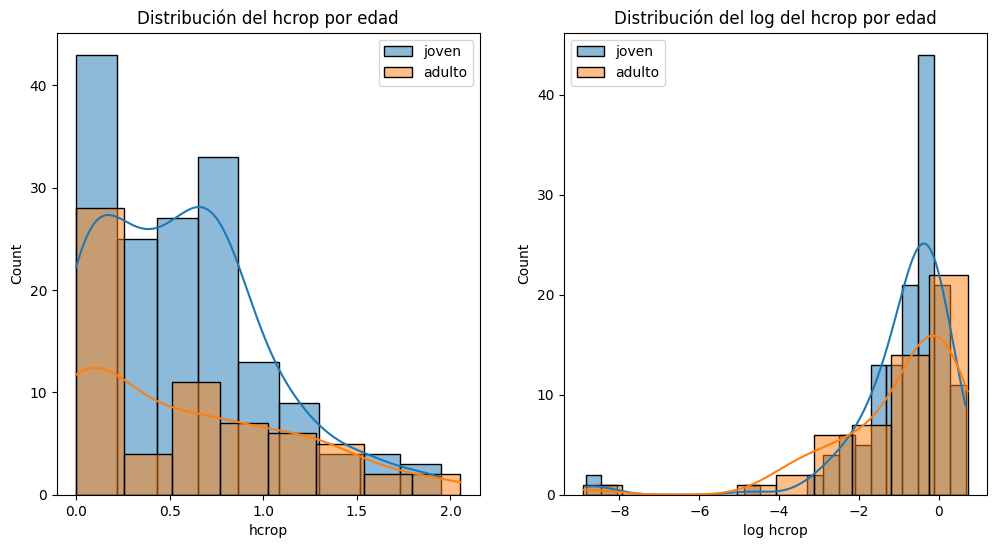

**************************************************************************************************************************
Prueba de normalidad para el grupo adulto
--------------------------------------------------------------------------------------------------------------------------
hcrop
Shapiro-Wilk Test: Estadístico=0.8805453795694305, p-valor=1.392823818483089e-05
se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal
Log del hcrop
Shapiro-Wilk Test: Estadístico=0.7805598112209726, p-valor=1.759324611249185e-07
se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal
**************************************************************************************************************************
Prueba de normalidad para el grupo joven
--------------------------------------------------------------------------------------------------------------------------
hcrop
Shapiro-Wil

In [58]:
adulto= data[data['edad'] == 'A']
joven = data[data['edad'] == 'J']

plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.histplot(joven['hcrop'], kde=True, label = 'joven')
sns.histplot(adulto['hcrop'], kde=True, label = 'adulto')
plt.title(f'Distribución del hcrop por edad')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(joven['log hcrop'], kde=True, label = 'joven')
sns.histplot(adulto['log hcrop'], kde=True, label = 'adulto')
plt.title(f'Distribución del log del hcrop por edad')
plt.legend()

plt.show()

print('**************************************************************************************************************************')
print('Prueba de normalidad para el grupo adulto')
print('--------------------------------------------------------------------------------------------------------------------------')
print('hcrop')
hcrop_adulto = adulto['hcrop']
stat, p_value = stats.shapiro(hcrop_adulto)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")
# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
    
print('Log del hcrop')
hcrop_adulto = adulto['log hcrop'].replace(float('-inf'), pd.NA).dropna()
stat, p_value = stats.shapiro(hcrop_adulto)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")
# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
    
print('**************************************************************************************************************************')
print('Prueba de normalidad para el grupo joven')
print('--------------------------------------------------------------------------------------------------------------------------')
print('hcrop')
hcrop_joven = joven['hcrop']
stat, p_value = stats.shapiro(hcrop_joven)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")
# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")

print('Log del hcrop')
hcrop_joven = joven['log hcrop'].replace(float('-inf'), pd.NA).dropna()
stat, p_value = stats.shapiro(hcrop_joven)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")

# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")

### Prueba de normalidad por horario

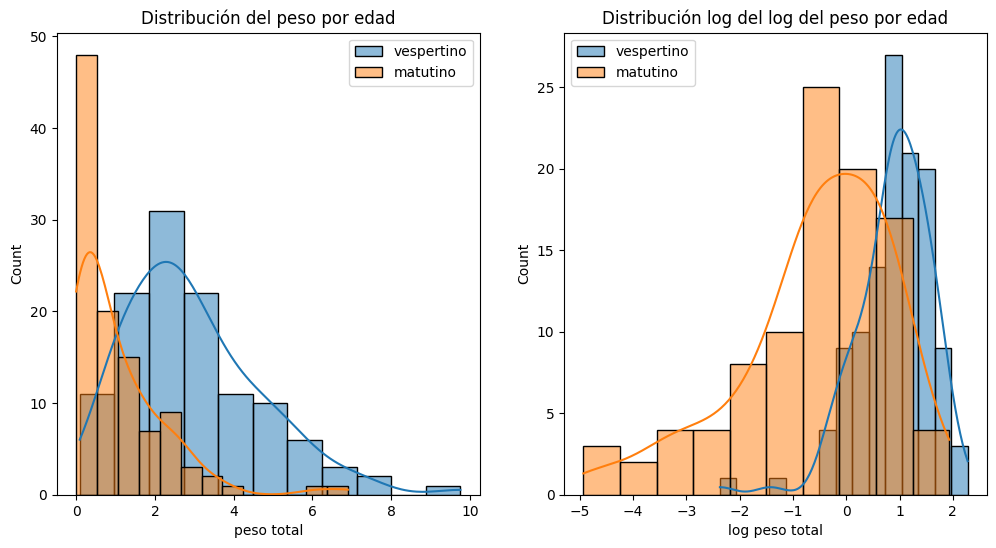

**************************************************************************************************************************
Prueba de normalidad para el grupo matutino
--------------------------------------------------------------------------------------------------------------------------
Peso total del buche
Shapiro-Wilk Test: Estadístico=0.7800669449010758, p-valor=2.333371128400248e-11
se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal
Log del peso total del buche
Shapiro-Wilk Test: Estadístico=0.928623145913715, p-valor=5.394527970533024e-05
se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal
**************************************************************************************************************************
Prueba de normalidad para el grupo vespertino
--------------------------------------------------------------------------------------------------------

In [59]:
#Separación por grupos
matutino= data[data['period'] == 'M']
vespertino = data[data['period'] == 'V']

#Graficos
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.histplot(vespertino['peso total'], kde=True, label = 'vespertino')
sns.histplot(matutino['peso total'], kde=True, label = 'matutino')
plt.title(f'Distribución del peso por edad')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(vespertino['log peso total'], kde=True, label = 'vespertino')
sns.histplot(matutino['log peso total'], kde=True, label = 'matutino')
plt.title(f'Distribución log del log del peso por edad')
plt.legend()

plt.show()

print('**************************************************************************************************************************')
print('Prueba de normalidad para el grupo matutino')
print('--------------------------------------------------------------------------------------------------------------------------')
print('Peso total del buche')

peso_matutino = matutino['peso total']
stat, p_value = stats.shapiro(peso_matutino)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")
# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")

print('Log del peso total del buche')
peso_matutino = matutino['log peso total'].replace(float('-inf'), pd.NA).dropna()
stat, p_value = stats.shapiro(peso_matutino)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")
# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
    
print('**************************************************************************************************************************')
print('Prueba de normalidad para el grupo vespertino')
print('--------------------------------------------------------------------------------------------------------------------------')
print('Peso total del buche')
peso_vespertino = vespertino['peso total']
stat, p_value = stats.shapiro(peso_vespertino)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")
# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
    
print('Log del peso total del buche')
peso_vespertino = vespertino['log peso total'].replace(float('-inf'), pd.NA).dropna()
stat, p_value = stats.shapiro(peso_vespertino)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")
# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")

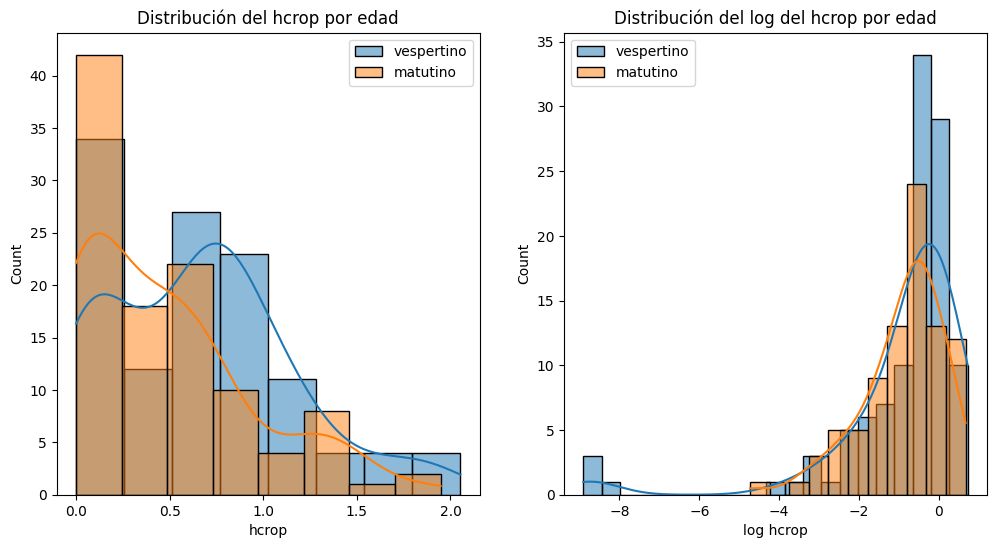

**************************************************************************************************************************
Prueba de normalidad para el grupo matutino
--------------------------------------------------------------------------------------------------------------------------
hcrop
Shapiro-Wilk Test: Estadístico=0.8837804647572708, p-valor=1.22821910812061e-07
se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal
Log del hcrop
Shapiro-Wilk Test: Estadístico=0.9241876498017664, p-valor=8.511703791583919e-05
se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal
**************************************************************************************************************************
Prueba de normalidad para el grupo vespertino
--------------------------------------------------------------------------------------------------------------------------
hcrop
Shapi

In [64]:
matutino= data[data['period'] == 'M']
vespertino = data[data['period'] == 'V']

plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.histplot(vespertino['hcrop'], kde=True, label = 'vespertino')
sns.histplot(matutino['hcrop'], kde=True, label = 'matutino')
plt.title(f'Distribución del hcrop por edad')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(vespertino['log hcrop'], kde=True, label = 'vespertino')
sns.histplot(matutino['log hcrop'], kde=True, label = 'matutino')
plt.title(f'Distribución del log del hcrop por edad')
plt.legend()

plt.show()

print('**************************************************************************************************************************')
print('Prueba de normalidad para el grupo matutino')
print('--------------------------------------------------------------------------------------------------------------------------')
print('hcrop')
hcrop_matutino = matutino['hcrop']
stat, p_value = stats.shapiro(hcrop_matutino)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")
# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
    
print('Log del hcrop')
hcrop_matutino = matutino['log hcrop'].replace(float('-inf'), pd.NA).dropna()
stat, p_value = stats.shapiro(hcrop_matutino)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")
# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
    
print('**************************************************************************************************************************')
print('Prueba de normalidad para el grupo vespertino')
print('--------------------------------------------------------------------------------------------------------------------------')
print('hcrop')
hcrop_vespertino = vespertino['hcrop']
stat, p_value = stats.shapiro(hcrop_vespertino)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")
# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")

print('Log del hcrop')
hcrop_vespertino = vespertino['log hcrop'].replace(float('-inf'), pd.NA).dropna()
stat, p_value = stats.shapiro(hcrop_vespertino)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")

# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")

## Pruebas no parametricas para comparar medias

Prueba Mann-Whitney U

Por estado

In [70]:
print('Prueba no parametrica para la media del peso entre estados: Az-Nm')
print('---------------------------------------------------------------------------------------------------------')
print('Peso Total')
stat, p_value = stats.mannwhitneyu(az['peso total'], nm['peso total'])
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")

# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")

print('---------------------------------------------------------------------------------------------------------')
print('hcrop')
stat, p_value = stats.mannwhitneyu(az['hcrop'], nm['hcrop'])
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")

# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")

Prueba no parametrica para la media del peso entre estados: Az-Nm
---------------------------------------------------------------------------------------------------------
Peso Total
Shapiro-Wilk Test: Estadístico=5685.5, p-valor=0.5583652444213274
no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal
---------------------------------------------------------------------------------------------------------
hcrop
Shapiro-Wilk Test: Estadístico=7767.0, p-valor=0.00014549345674741055
se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal


Por edad

In [71]:
print('Prueba no parametrica para la media del peso entre edades: Adulto-Joven')
print('---------------------------------------------------------------------------------------------------------')
print('Peso Total')
stat, p_value = stats.mannwhitneyu(adulto['peso total'], joven['peso total'])
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")

# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")

print('---------------------------------------------------------------------------------------------------------')
print('hcrop')
stat, p_value = stats.mannwhitneyu(adulto['hcrop'], joven['hcrop'])
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")

# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")

Prueba no parametrica para la media del peso entre edades: Adulto-Joven
---------------------------------------------------------------------------------------------------------
Peso Total
Shapiro-Wilk Test: Estadístico=5182.5, p-valor=0.9114116270394178
no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal
---------------------------------------------------------------------------------------------------------
hcrop
Shapiro-Wilk Test: Estadístico=4987.0, p-valor=0.5814759613451096
no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal


Por periodo

In [72]:
print('Prueba no parametrica para la media del peso entre edades: matutino-vespertino')
print('---------------------------------------------------------------------------------------------------------')
print('Peso Total')
stat, p_value = stats.mannwhitneyu(matutino['peso total'], vespertino['peso total'])
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")

# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")

print('---------------------------------------------------------------------------------------------------------')
print('hcrop')
stat, p_value = stats.mannwhitneyu(matutino['hcrop'], vespertino['hcrop'])
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")

# Interpretación del p-valor
if p_value > 0.05:
    print("no se rechaza H0, NO hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")
else:
    print("se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal")

Prueba no parametrica para la media del peso entre edades: matutino-vespertino
---------------------------------------------------------------------------------------------------------
Peso Total
Shapiro-Wilk Test: Estadístico=1861.0, p-valor=4.325269219465645e-20
se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal
---------------------------------------------------------------------------------------------------------
hcrop
Shapiro-Wilk Test: Estadístico=4745.0, p-valor=0.0009450642771342564
se rechaza H0, hay evidencia para rechazar la hipotesis de que la distrución de donde viene la muestra es normal
